# Chennai Cars

In [23]:
import json
import pandas as pd

df = pd.read_excel("./data/chennai_cars.xlsx")

In [29]:
import json
import pandas as pd

df = pd.read_excel("./data/chennai_cars.xlsx")

new_data = []
def format_json(item):
    data = item.replace("'", '"')
    data = data.replace("None", "null")
    return data

for index, row in df.iterrows():
    new_car_detail = format_json(row['new_car_detail'])
    new_car_overview = format_json(row['new_car_overview'])
    new_car_feature = format_json(row['new_car_feature'])
    new_car_specs = format_json(row['new_car_specs'])

    try:
        car_details = json.loads(new_car_detail)
    
        car_overview = json.loads(new_car_overview)
        top_data = car_overview.get('top', [])

        car_feature = json.loads(new_car_feature)

        combined_row = car_details.copy()
    
        for item in top_data:
            key_column_name = item.get('key', '').replace(' ', '_')
            combined_row[key_column_name] = item.get('value', '')

        features = car_feature.get('top', [])
        if isinstance(features, list):
            feature_values = [item.get('value', '') for item in features]
            combined_row['Features'] = ', '.join(feature_values)  # Combine all features into a single string
        else:
            combined_row['Features'] = ''

        # Extract nested data if needed
        sections = car_feature.get('data', [])
        for section in sections:
            sub_heading = section.get('subHeading', '').replace(' ', '_')
            section_list = [item.get('value', '') for item in section.get('list', [])]
            combined_row[sub_heading] = ', '.join(section_list)

        new_data.append(combine_row)

    except json.JSONDecodeError as e:
        print(f"Error parsing row {index}: {e}")

new_df = pd.DataFrame(new_data)

csv_file_name = "parsed_full_dataset.csv"
new_df.to_csv(csv_file_name, index=False)

print(f"Data successfully saved to {csv_file_name}")

Data successfully saved to parsed_full_dataset.csv


In [30]:
import json
import pandas as pd

# Initialize an empty list to store parsed dictionaries
new_data = []

# Function to clean and format JSON-like strings
def format_json(item):
    data = item.replace("'", '"')  # Replace single quotes with double quotes
    data = data.replace("None", "null")  # Replace None with null
    return data

# Load your Excel file into a DataFrame
df = pd.read_excel("./data/chennai_cars.xlsx")  # Replace with your actual file path

# Verify that the DataFrame is loaded correctly
print(f"DataFrame loaded with {len(df)} rows.")

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    print(f"Processing row {index}...")  # Debugging line to track progress

    try:
        # Parse new_car_detail, new_car_overview, and new_car_feature
        new_car_detail = format_json(row['new_car_detail'])
        new_car_overview = format_json(row['new_car_overview'])
        new_car_feature = format_json(row['new_car_feature'])

        # Convert the strings to dictionaries
        car_details = json.loads(new_car_detail)
        car_overview = json.loads(new_car_overview)
        car_feature = json.loads(new_car_feature)

        # Check if car_feature is a dictionary
        if not isinstance(car_feature, dict):
            raise ValueError(f"Expected car_feature to be a dictionary, got {type(car_feature)}")

        # Extract 'top' from new_car_overview
        top_data = car_overview.get('top', [])
        
        # Create a combined dictionary with car_details as base
        combined_row = car_details.copy()  # Use car_details as the base dictionary

        # Add each 'key' from top_data to the combined_row dictionary
        for item in top_data:
            key_column_name = item.get('key', '').replace(' ', '_')
            combined_row[key_column_name] = item.get('value', '')

        # Extract features from new_car_feature
        features = car_feature.get('top', [])
        if isinstance(features, list):
            feature_values = [item.get('value', '') for item in features]
            combined_row['Features'] = ', '.join(feature_values)  # Combine all features into a single string
        else:
            combined_row['Features'] = ''

        # Extract nested data if needed
        sections = car_feature.get('data', [])
        for section in sections:
            sub_heading = section.get('subHeading', '').replace(' ', '_')
            section_list = [item.get('value', '') for item in section.get('list', [])]
            combined_row[sub_heading] = ', '.join(section_list)  # Combine all items in section into a string

        # Append the combined_row dictionary to new_data list
        new_data.append(combined_row)

    except (json.JSONDecodeError, ValueError) as e:
        print(f"Error parsing row {index}: {e}")

# Create a new DataFrame from the list of combined dictionaries
new_df = pd.DataFrame(new_data)

# Save the new DataFrame to a CSV file
csv_file_name = "parsed_full_dataset.csv"
new_df.to_csv(csv_file_name, index=False)

print(f"Data successfully saved to {csv_file_name}")


DataFrame loaded with 1419 rows.
Processing row 0...
Processing row 1...
Processing row 2...
Processing row 3...
Processing row 4...
Processing row 5...
Processing row 6...
Processing row 7...
Processing row 8...
Processing row 9...
Processing row 10...
Processing row 11...
Processing row 12...
Processing row 13...
Processing row 14...
Processing row 15...
Processing row 16...
Processing row 17...
Processing row 18...
Processing row 19...
Processing row 20...
Processing row 21...
Processing row 22...
Processing row 23...
Processing row 24...
Processing row 25...
Processing row 26...
Processing row 27...
Processing row 28...
Processing row 29...
Processing row 30...
Processing row 31...
Processing row 32...
Processing row 33...
Processing row 34...
Processing row 35...
Processing row 36...
Processing row 37...
Processing row 38...
Processing row 39...
Processing row 40...
Processing row 41...
Processing row 42...
Processing row 43...
Processing row 44...
Processing row 45...
Processing 

In [31]:
import json
import pandas as pd

# Initialize an empty list to store parsed dictionaries
new_data = []

# Function to clean and format JSON-like strings
def format_json(item):
    data = item.replace("'", '"')  # Replace single quotes with double quotes
    data = data.replace("None", "null")  # Replace None with null
    return data

# Load your Excel file into a DataFrame
df = pd.read_excel("./data/chennai_cars.xlsx")  # Replace with your actual file path

# Verify that the DataFrame is loaded correctly
print(f"DataFrame loaded with {len(df)} rows.")

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    print(f"Processing row {index}...")  # Debugging line to track progress

    try:
        # Parse new_car_detail, new_car_overview, new_car_feature, and new_car_specs
        new_car_detail = format_json(row['new_car_detail'])
        new_car_overview = format_json(row['new_car_overview'])
        new_car_feature = format_json(row['new_car_feature'])
        new_car_specs = format_json(row['new_car_specs'])

        # Convert the strings to dictionaries
        car_details = json.loads(new_car_detail)
        car_overview = json.loads(new_car_overview)
        car_feature = json.loads(new_car_feature)
        car_specs = json.loads(new_car_specs)

        # Check if car_feature is a dictionary
        if not isinstance(car_feature, dict):
            raise ValueError(f"Expected car_feature to be a dictionary, got {type(car_feature)}")

        # Create a combined dictionary with car_details as base
        combined_row = car_details.copy()  # Use car_details as the base dictionary

        # Add each 'key' from top_data in new_car_overview to the combined_row dictionary
        top_data = car_overview.get('top', [])
        for item in top_data:
            key_column_name = item.get('key', '').replace(' ', '_')
            combined_row[key_column_name] = item.get('value', '')

        # Add features from new_car_feature
        features = car_feature.get('top', [])
        if isinstance(features, list):
            feature_values = [item.get('value', '') for item in features]
            combined_row['Features'] = ', '.join(feature_values)  # Combine all features into a single string
        else:
            combined_row['Features'] = ''

        # Add specs from new_car_specs
        specs = car_specs.get('top', [])
        if isinstance(specs, list):
            for item in specs:
                key_column_name = item.get('key', '').replace(' ', '_')
                combined_row[key_column_name] = item.get('value', '')

        # Extract nested data if needed
        sections = car_specs.get('data', [])
        for section in sections:
            sub_heading = section.get('subHeading', '').replace(' ', '_')
            section_list = [item.get('value', '') for item in section.get('list', [])]
            combined_row[sub_heading] = ', '.join(section_list)  # Combine all items in section into a string

        # Append the combined_row dictionary to new_data list
        new_data.append(combined_row)

    except (json.JSONDecodeError, ValueError) as e:
        print(f"Error parsing row {index}: {e}")

# Create a new DataFrame from the list of combined dictionaries
new_df = pd.DataFrame(new_data)

# Save the new DataFrame to a CSV file
csv_file_name = "full_dataset.csv"
new_df.to_csv(csv_file_name, index=False)

print(f"Data successfully saved to {csv_file_name}")


DataFrame loaded with 1419 rows.
Processing row 0...


TypeError: sequence item 5: expected str instance, int found

In [65]:
import json
import pandas as pd

new_data = []

def format_json(item):
    data = item.replace("'", '"')
    data = data.replace("None", "null")
    return data

df = pd.read_excel("./data/kolkata_cars.xlsx")

for index, row in df.iterrows():

    try:
        new_car_detail = format_json(row['new_car_detail'])
        new_car_overview = format_json(row['new_car_overview'])
        new_car_feature = format_json(row['new_car_feature'])
        new_car_specs = format_json(row['new_car_specs'])

        # Convert the strings to dictionaries
        car_details = json.loads(new_car_detail)
        car_overview = json.loads(new_car_overview)
        car_feature = json.loads(new_car_feature)
        car_specs = json.loads(new_car_specs)

        # Check if car_feature is a dictionary
        if not isinstance(car_feature, dict):
            raise ValueError(f"Expected car_feature to be a dictionary, got {type(car_feature)}")

        # Create a combined dictionary with car_details as base
        combined_row = car_details.copy()  # Use car_details as the base dictionary

        # Add each 'key' from top_data in new_car_overview to the combined_row dictionary
        top_data = car_overview.get('top', [])
        for item in top_data:
            key_column_name = item.get('key', '').replace(' ', '_').lower()
            combined_row[key_column_name] = item.get('value', '')

        # Add features from new_car_feature
        features = car_feature.get('top', [])
        if isinstance(features, list):
            feature_values = [item.get('value', '') for item in features]
            combined_row['Features'] = ', '.join(feature_values)  # Combine all features into a single string
        else:
            combined_row['Features'] = ''

        # Add specs from new_car_specs
        specs = car_specs.get('top', [])
        if isinstance(specs, list):
            for item in specs:
                key_column_name = item.get('key', '').replace(' ', '_').lower()
                combined_row[key_column_name] = item.get('value', '')

        # Extract nested data if needed
        sections = car_specs.get('data', [])
        for section in sections:
            sub_heading = section.get('subHeading', '').replace(' ', '_').lower()
            section_list = [str(item.get('value', '')) for item in section.get('list', [])]  # Convert all to strings
            combined_row[sub_heading] = ', '.join(section_list)  # Combine all items in section into a string

        # Append the combined_row dictionary to new_data list
        new_data.append(combined_row)

    except (json.JSONDecodeError, ValueError) as e:
        print(f"Error parsing row {index}: {e}")

# Create a new DataFrame from the list of combined dictionaries
new_df = pd.DataFrame(new_data)

new_row_names = {'model': 'model_name', 'ownerno': 'ownership', 'registration_year': 'reg_year', 'km': 'km_driven'}
new_df_renamed = new_df.rename(columns=new_row_names)

columns_to_drop = ['it', 'ft', 'oem', 'owner','centralVariantId', 'insurance_validity','rto', 'ownership', 'priceActual', 'priceSaving', 'priceFixedText', 'trendingText', 'kms_driven']
new_df = new_df_renamed.drop(columns=columns_to_drop)

# Save the new DataFrame to a CSV file
csv_file_name = "./format/1_cars_dataset.csv"
new_df.to_csv(csv_file_name, index=False)

print(f"Data successfully saved to {csv_file_name}")
# new_df

Data successfully saved to ./format/1_cars_dataset.csv


In [51]:
new_df.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem', 'model',
       'modelYear', 'centralVariantId', 'variantName', 'price',
       'registration_year', 'insurance_validity', 'fuel_type', 'seats', 'rto',
       'ownership', 'engine_displacement', 'year_of_manufacture', 'Features',
       'mileage', 'engine', 'max_power', 'torque', 'wheel_size', 'dimensions',
       'miscellaneous'],
      dtype='object')

In [55]:
new_row_names = {'model': 'model_name', 'registration_year': 'reg_year', 'km': 'km_driven'}
new_df = new_df.rename(index=new_row_names)
new_df

,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,...,engine_displacement,year_of_manufacture,Features,mileage,engine,max_power,torque,wheel_size,dimensions,miscellaneous
0,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,2123,Hybrid,...,2494 cc,2014.0,"Power Steering, Power Windows Front, Air Condi...",19.16 kmpl,"White, 2AR FXE Petrol Engine , 2494, 158.2bhp@...",158.2bhp,213Nm,17,"4825mm, 1825mm, 1480mm, 2775mm, 1580mm, 1570mm...","6 Speed , FWD, 5, Power, 5.5 metres, Ventilate..."
1,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,5236,T Option,...,799 cc,2017.0,"Power Steering, Power Windows Front, Air Condi...",22.7 kmpl,"Red, 0.8L Petrol Engine, 799, 53.64bhp@5678rpm...",53.64bhp,72Nm,NaN,"3429mm, 1560mm, 1541mm, 185mm, 2348mm, 770","5-Speed, 2WD, 5, Power, 4.7m, Disc, Drum, 5, 222"
2,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,8352,RXT AMT,...,999 cc,2021.0,"Power Steering, Power Windows Front, Air Condi...",19.03 kmpl,"Blue, 1.0L energy, 999, 71.01bhp@6250rpm, 96Nm...",71.01bhp,96Nm,NaN,"3991mm, 1750, 1605, 2500, 1536, 1535, 1055","5 Speed, 5, Electric, Disc, Drum, Tubeless, Ra..."
3,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1642,1.2 Sportz,...,1197 cc,2011.0,"Power Steering, Power Windows Front, Air Condi...",17 kmpl,"Red, In-Line Engine, 1197, 80 PS at 5200 rpm, ...",80 PS at 5200 rpm,"11.4 kgm at 4,000 rpm",14,"3940 mm, 1710 mm, 1505 mm, 2,525 mm, 1,505 mm,...","5 Speed, FWD, 5, Power, 5.20 m, Disc, Drum, 12..."
4,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,99,35 TDI Quattro Premium,...,1968 cc,2014.0,"Power Steering, Power Windows Front, Air Condi...",15.73 kmpl,"White, TDI Diesel Engine, 1968, 174.33bhp@4200...",174.33bhp,380Nm,16,"4385mm, 2019mm, 1608mm, 2603mm, 1571mm, 1575mm...","7-Speed S-Tronic , AWD, 5, Power, 5.9 metres, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,8682,ZXI BSVI,...,998 cc,2022.0,"Power Steering, Power Windows Front, Air Condi...",25.24 kmpl,"Others, K10C, 998, 65.71bhp@5500rpm, 89Nm@3500...",65.71bhp,89Nm,NaN,"3695mm, 1655, 1555, 2435, 1430, 1440, 810, 1260","5-Speed, 5, Electric, Ventilated Disc, Drum, T..."
1377,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,3943,LXI,...,796 cc,2014.0,"Power Steering, Power Windows Front, Air Condi...",22.74 kmpl,"Others, F8D Petrol Engine, 796, 47.3bhp@6000rp...",47.3bhp,69Nm,NaN,"3395mm, 1490mm, 1475mm, 2360mm, 1295mm, 1290mm...","5 Speed, FWD, 5, Power, 4.6 metres, Solid Disc..."
1378,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,4672,C 200 CGI Elegance,...,1796 cc,2011.0,"Power Steering, Power Windows Front, Air Condi...",11.74 kmpl,"Others, Blue Efficiency Engine, 1796, 186bhp@5...",186bhp,285Nm,17,"4591mm, 1770mm, 1447mm, 2760mm, 1549mm, 1552mm...","7 Speed, RWD, 5, Power, 5.42 metres, Ventilate..."
1379,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,4144,ZXi,...,1197 cc,2012.0,"Power Steering, Power Windows Front, Air Condi...",18.5 kmpl,"Others, K Series Petrol Engine, 1197, 85.80bhp...",85.80bhp,114Nm,14,"3775mm, 1680mm, 1620mm, 2360mm, 1470mm, 1480mm...","5 Speed, FWD, 5, Power, 4.7 metres, Ventilated..."


In [54]:
new_df.isnull().sum()

bt                       0
km                       0
transmission             0
ownerNo                  0
owner                    0
oem                      0
model                    0
modelYear                0
centralVariantId         0
variantName              0
price                    0
registration_year        5
insurance_validity       0
fuel_type                0
seats                    3
rto                    178
ownership                4
engine_displacement      0
year_of_manufacture      1
Features                 0
mileage                 47
engine                   0
max_power               10
torque                  10
wheel_size             544
dimensions               4
miscellaneous            3
dtype: int64

In [21]:
import pandas as pd
import glob
import os

# Define the path pattern for your CSV files
csv_files_pattern = './structured_data/*.csv'

# List to hold DataFrames
dataframes = []

# Read each CSV file
for file in glob.glob(csv_files_pattern):
    df = pd.read_csv(file)
                     
    base_file_name = os.path.basename(file).replace('.csv', '')

    split_file_name = base_file_name.split('_')[0]
    
    df['city'] = split_file_name
    
    dataframes.append(df)

# List of columns you want to keep
required_columns = ['city', 'model','registration_year', 'ownership', 'price','km','fuel_type','transmission','mileage', 'engine','max_power', 'torque', 'seats']

# Filter columns and concatenate DataFrames
filtered_dfs = []
for df in dataframes:
    # Keep only the required columns
    filtered_df = df[required_columns]
    filtered_dfs.append(filtered_df)

# Concatenate all filtered DataFrames
combined_df = pd.concat(filtered_dfs, ignore_index=True)

combined_df.dropna(inplace=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_filtered_data.csv', index=False)

print("New CSV file with required columns has been created.")


New CSV file with required columns has been created.


In [22]:
combined_df

,city,model,registration_year,ownership,price,km,fuel_type,transmission,mileage,engine,max_power,torque,seats
0,bangalore,Maruti Celerio,2015,Third Owner,₹ 4 Lakh,"1,20,000",Petrol,Manual,23.1 kmpl,"White, K10B Engine, 998, 67.04bhp@6000rpm, 90N...",67.04bhp,90Nm,5.0
1,bangalore,Ford Ecosport,Feb 2018,Second Owner,₹ 8.11 Lakh,"32,706",Petrol,Manual,17 kmpl,"White, Ti-VCT Petrol Engine, 1497, 121.31bhp@6...",121.31bhp,150Nm,5.0
2,bangalore,Tata Tiago,Sept 2018,First Owner,₹ 5.85 Lakh,"11,949",Petrol,Manual,23.84 kmpl,"Red, Revotron Engine, 1199, 84bhp@6000rpm, 114...",84bhp,114Nm,5.0
3,bangalore,Hyundai Xcent,Dec 2014,First Owner,₹ 4.62 Lakh,"17,794",Petrol,Manual,19.1 kmpl,"Others, Kappa VTVT Petrol Engine, 1197, 81.86b...",81.86bhp,113.75Nm,5.0
4,bangalore,Maruti SX4 S Cross,2015,First Owner,₹ 7.90 Lakh,"60,000",Diesel,Manual,23.65 kmpl,"Gray, DDiS 200 Diesel Engine, 1248, 88.5bhp@40...",88.5bhp,200Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,delhi,Mahindra Scorpio,Oct 2016,First Owner,₹ 8.40 Lakh,"71,000",Diesel,Manual,15.4 kmpl,"White, mHawk Diesel Engine, 1997, 120bhp@4000...",120bhp,280Nm,7.0
8364,delhi,Honda City,2019,First Owner,₹ 9 Lakh,"60,000",Petrol,Automatic,18 kmpl,"Others, i VTEC Engine, 1497, 117.6bhp@6600rpm,...",117.6bhp,145Nm,5.0
8365,delhi,Kia Sonet,2021,First Owner,₹ 9.50 Lakh,"20,000",Petrol,Manual,18.4 kmpl,"Others, SMARTSTREAM G1.2, 1197, 81.86bhp@6000r...",81.86bhp,115Nm,5.0
8366,delhi,Hyundai Verna,2011,First Owner,₹ 4.18 Lakh,"60,000",Petrol,Manual,17.01 kmpl,"Others, VTVT Petrol Engine, 1591, 121.3bhp@630...",121.3bhp,154.9Nm,5.0


In [23]:
combined_df.isnull().sum()

city                 0
model                0
registration_year    0
ownership            0
price                0
km                   0
fuel_type            0
transmission         0
mileage              0
engine               0
max_power            0
torque               0
seats                0
dtype: int64

In [24]:
def convert_price(price_str):
    # Check if the value is already a float
    if isinstance(price_str, float):
        return int(price_str)  # Convert to integer to remove decimals
    
    # Remove ₹ symbol and strip spaces if it's a string
    price_str = price_str.replace('₹', '').strip()

    # Convert based on the suffix (Lakh, Thousand, Crore)
    if 'Lakh' in price_str:
        return int(float(price_str.replace('Lakh', '').strip()) * 100000)
    elif 'Thousand' in price_str:
        return int(float(price_str.replace('Thousand', '').strip()) * 1000)
    elif 'Crore' in price_str:
        return int(float(price_str.replace('Crore', '').strip()) * 10000000)
    else:
        # Handle cases without a suffix, e.g., "1,20,000"
        return int(float(price_str.replace(',', '')))

def convert_mileage(mileage_str):
    # If the mileage value is already a float, return it directly
    if isinstance(mileage_str, float):
        return mileage_str
    elif 'kmpl' in mileage_str:
        # For kmpl, remove the 'kmpl' part and convert to float
        return float(mileage_str.replace(' kmpl', '').strip())
    elif 'km/kg' in mileage_str:
        # For km/kg, remove the 'km/kg' part and convert to float
        return float(mileage_str.replace(' km/kg', '').strip())
    else:
        return None  # Handle cases where the format is unexpected

# Apply the conversion function to the 'mileage' column
combined_df['mileage'] = combined_df['mileage'].apply(convert_mileage)

def convert_max_power(max_power_str):
    if isinstance(max_power_str, str):
        # Remove 'bhp' regardless of whether there is a space or not
        max_power_str = max_power_str.replace('bhp', '').strip()
        try:
            return float(max_power_str)
        except ValueError:
            return None
    return None

combined_df['max_power'] = combined_df['max_power'].apply(convert_max_power)

def convert_torque(torque_str):
    if isinstance(torque_str, str):
        # Remove 'bhp' regardless of whether there is a space or not
        torque_str = torque_str.replace('Nm', '').strip()
        try:
            return float(torque_str)
        except ValueError:
            return None
    return None

combined_df['torque'] = combined_df['torque'].apply(convert_torque)

# Apply the conversion function to the 'price' column
combined_df['price'] = combined_df['price'].apply(convert_price)
combined_df['km'] = combined_df['km'].str.replace(',', '').str.strip()

import re

def format_reg_year(reg_year_str):
    # Check if the string contains a 4-digit year (e.g., 2015)
    if isinstance(reg_year_str, str):
        # Extract the first 4-digit number found in the string
        year_match = re.search(r'\b\d{4}\b', reg_year_str)
        if year_match:
            return int(year_match.group(0))  # Return the year as an integer
    return None

# Apply the function to the 'reg_year' column
combined_df['registration_year'] = combined_df['registration_year'].apply(format_reg_year)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('car_prediction_data.csv', index=False)

print("New CSV file with required columns has been created.")
combined_df

New CSV file with required columns has been created.


,city,model,registration_year,ownership,price,km,fuel_type,transmission,mileage,engine,max_power,torque,seats
0,bangalore,Maruti Celerio,2015,Third Owner,400000,120000,Petrol,Manual,23.10,"White, K10B Engine, 998, 67.04bhp@6000rpm, 90N...",67.04,90.00,5.0
1,bangalore,Ford Ecosport,2018,Second Owner,811000,32706,Petrol,Manual,17.00,"White, Ti-VCT Petrol Engine, 1497, 121.31bhp@6...",121.31,150.00,5.0
2,bangalore,Tata Tiago,2018,First Owner,585000,11949,Petrol,Manual,23.84,"Red, Revotron Engine, 1199, 84bhp@6000rpm, 114...",84.00,114.00,5.0
3,bangalore,Hyundai Xcent,2014,First Owner,462000,17794,Petrol,Manual,19.10,"Others, Kappa VTVT Petrol Engine, 1197, 81.86b...",81.86,113.75,5.0
4,bangalore,Maruti SX4 S Cross,2015,First Owner,790000,60000,Diesel,Manual,23.65,"Gray, DDiS 200 Diesel Engine, 1248, 88.5bhp@40...",88.50,200.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,delhi,Mahindra Scorpio,2016,First Owner,840000,71000,Diesel,Manual,15.40,"White, mHawk Diesel Engine, 1997, 120bhp@4000...",120.00,280.00,7.0
8364,delhi,Honda City,2019,First Owner,900000,60000,Petrol,Automatic,18.00,"Others, i VTEC Engine, 1497, 117.6bhp@6600rpm,...",117.60,145.00,5.0
8365,delhi,Kia Sonet,2021,First Owner,950000,20000,Petrol,Manual,18.40,"Others, SMARTSTREAM G1.2, 1197, 81.86bhp@6000r...",81.86,115.00,5.0
8366,delhi,Hyundai Verna,2011,First Owner,418000,60000,Petrol,Manual,17.01,"Others, VTVT Petrol Engine, 1591, 121.3bhp@630...",121.30,154.90,5.0


In [25]:
df.model.nunique()

200

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'statsmodels'

In [27]:
cardata = pd.read_csv('car_prediction_data.csv')
cardata.head()

,city,model,registration_year,ownership,price,km,fuel_type,transmission,mileage,engine,max_power,torque,seats
0,bangalore,Maruti Celerio,2015,Third Owner,400000,120000,Petrol,Manual,23.10,"White, K10B Engine, 998, 67.04bhp@6000rpm, 90N...",67.04,90.00,5.0
1,bangalore,Ford Ecosport,2018,Second Owner,811000,32706,Petrol,Manual,17.00,"White, Ti-VCT Petrol Engine, 1497, 121.31bhp@6...",121.31,150.00,5.0
2,bangalore,Tata Tiago,2018,First Owner,585000,11949,Petrol,Manual,23.84,"Red, Revotron Engine, 1199, 84bhp@6000rpm, 114...",84.00,114.00,5.0
3,bangalore,Hyundai Xcent,2014,First Owner,462000,17794,Petrol,Manual,19.10,"Others, Kappa VTVT Petrol Engine, 1197, 81.86b...",81.86,113.75,5.0
4,bangalore,Maruti SX4 S Cross,2015,First Owner,790000,60000,Diesel,Manual,23.65,"Gray, DDiS 200 Diesel Engine, 1248, 88.5bhp@40...",88.50,200.00,5.0


In [28]:
cardata.shape

(8002, 13)

In [29]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               8002 non-null   object 
 1   model              8002 non-null   object 
 2   registration_year  8002 non-null   int64  
 3   ownership          8002 non-null   object 
 4   price              8002 non-null   int64  
 5   km                 8002 non-null   int64  
 6   fuel_type          8002 non-null   object 
 7   transmission       8002 non-null   object 
 8   mileage            8002 non-null   float64
 9   engine             8002 non-null   object 
 10  max_power          7830 non-null   float64
 11  torque             7258 non-null   float64
 12  seats              8002 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 812.8+ KB


In [30]:
(cardata.isnull().sum()/len(cardata))*100

city                 0.000000
model                0.000000
registration_year    0.000000
ownership            0.000000
price                0.000000
km                   0.000000
fuel_type            0.000000
transmission         0.000000
mileage              0.000000
engine               0.000000
max_power            2.149463
torque               9.297676
seats                0.000000
dtype: float64

In [31]:
cardata['max_power'] = cardata['max_power'].replace({" ": np.NaN})

In [32]:
cardata.dropna(inplace=True)

In [33]:
(cardata.isnull().sum()/len(cardata))*100

city                 0.0
model                0.0
registration_year    0.0
ownership            0.0
price                0.0
km                   0.0
fuel_type            0.0
transmission         0.0
mileage              0.0
engine               0.0
max_power            0.0
torque               0.0
seats                0.0
dtype: float64

In [34]:
cardata.shape

(7196, 13)

In [35]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7196 entries, 0 to 8000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               7196 non-null   object 
 1   model              7196 non-null   object 
 2   registration_year  7196 non-null   int64  
 3   ownership          7196 non-null   object 
 4   price              7196 non-null   int64  
 5   km                 7196 non-null   int64  
 6   fuel_type          7196 non-null   object 
 7   transmission       7196 non-null   object 
 8   mileage            7196 non-null   float64
 9   engine             7196 non-null   object 
 10  max_power          7196 non-null   float64
 11  torque             7196 non-null   float64
 12  seats              7196 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 787.1+ KB


In [36]:
cardata.drop(columns=['model'], inplace=True)

In [37]:
cardata['registration_year'] = cardata['registration_year'].astype('object')

In [38]:
cardata.head()

,city,registration_year,ownership,price,km,fuel_type,transmission,mileage,engine,max_power,torque,seats
0,bangalore,2015,Third Owner,400000,120000,Petrol,Manual,23.10,"White, K10B Engine, 998, 67.04bhp@6000rpm, 90N...",67.04,90.00,5.0
1,bangalore,2018,Second Owner,811000,32706,Petrol,Manual,17.00,"White, Ti-VCT Petrol Engine, 1497, 121.31bhp@6...",121.31,150.00,5.0
2,bangalore,2018,First Owner,585000,11949,Petrol,Manual,23.84,"Red, Revotron Engine, 1199, 84bhp@6000rpm, 114...",84.00,114.00,5.0
3,bangalore,2014,First Owner,462000,17794,Petrol,Manual,19.10,"Others, Kappa VTVT Petrol Engine, 1197, 81.86b...",81.86,113.75,5.0
4,bangalore,2015,First Owner,790000,60000,Diesel,Manual,23.65,"Gray, DDiS 200 Diesel Engine, 1248, 88.5bhp@40...",88.50,200.00,5.0


In [43]:
cat_cols = ['registration_year','fuel_type','transmission','ownership']
num_cols = ['price','km','mileage','engine','max_power','seats']

/var/folders/jf/t6w9jnc93hn7d69c7kmy6r380000gn/T/ipykernel_2483/638989014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cardata['price'])


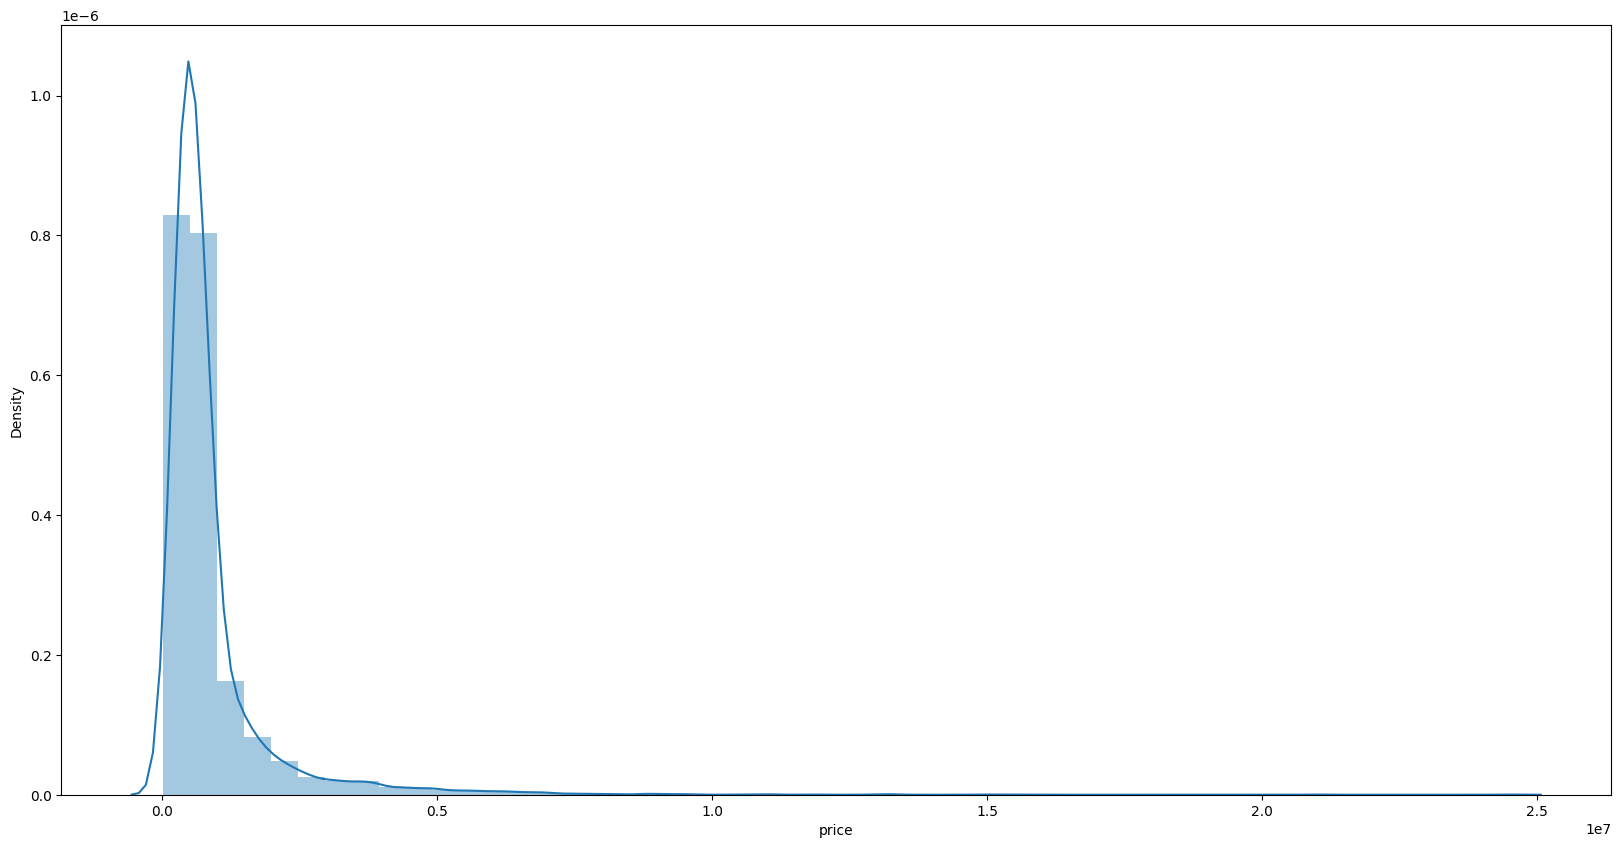

In [44]:
plt.figure(figsize = [20,10])

sns.distplot(cardata['price'])
plt.show()

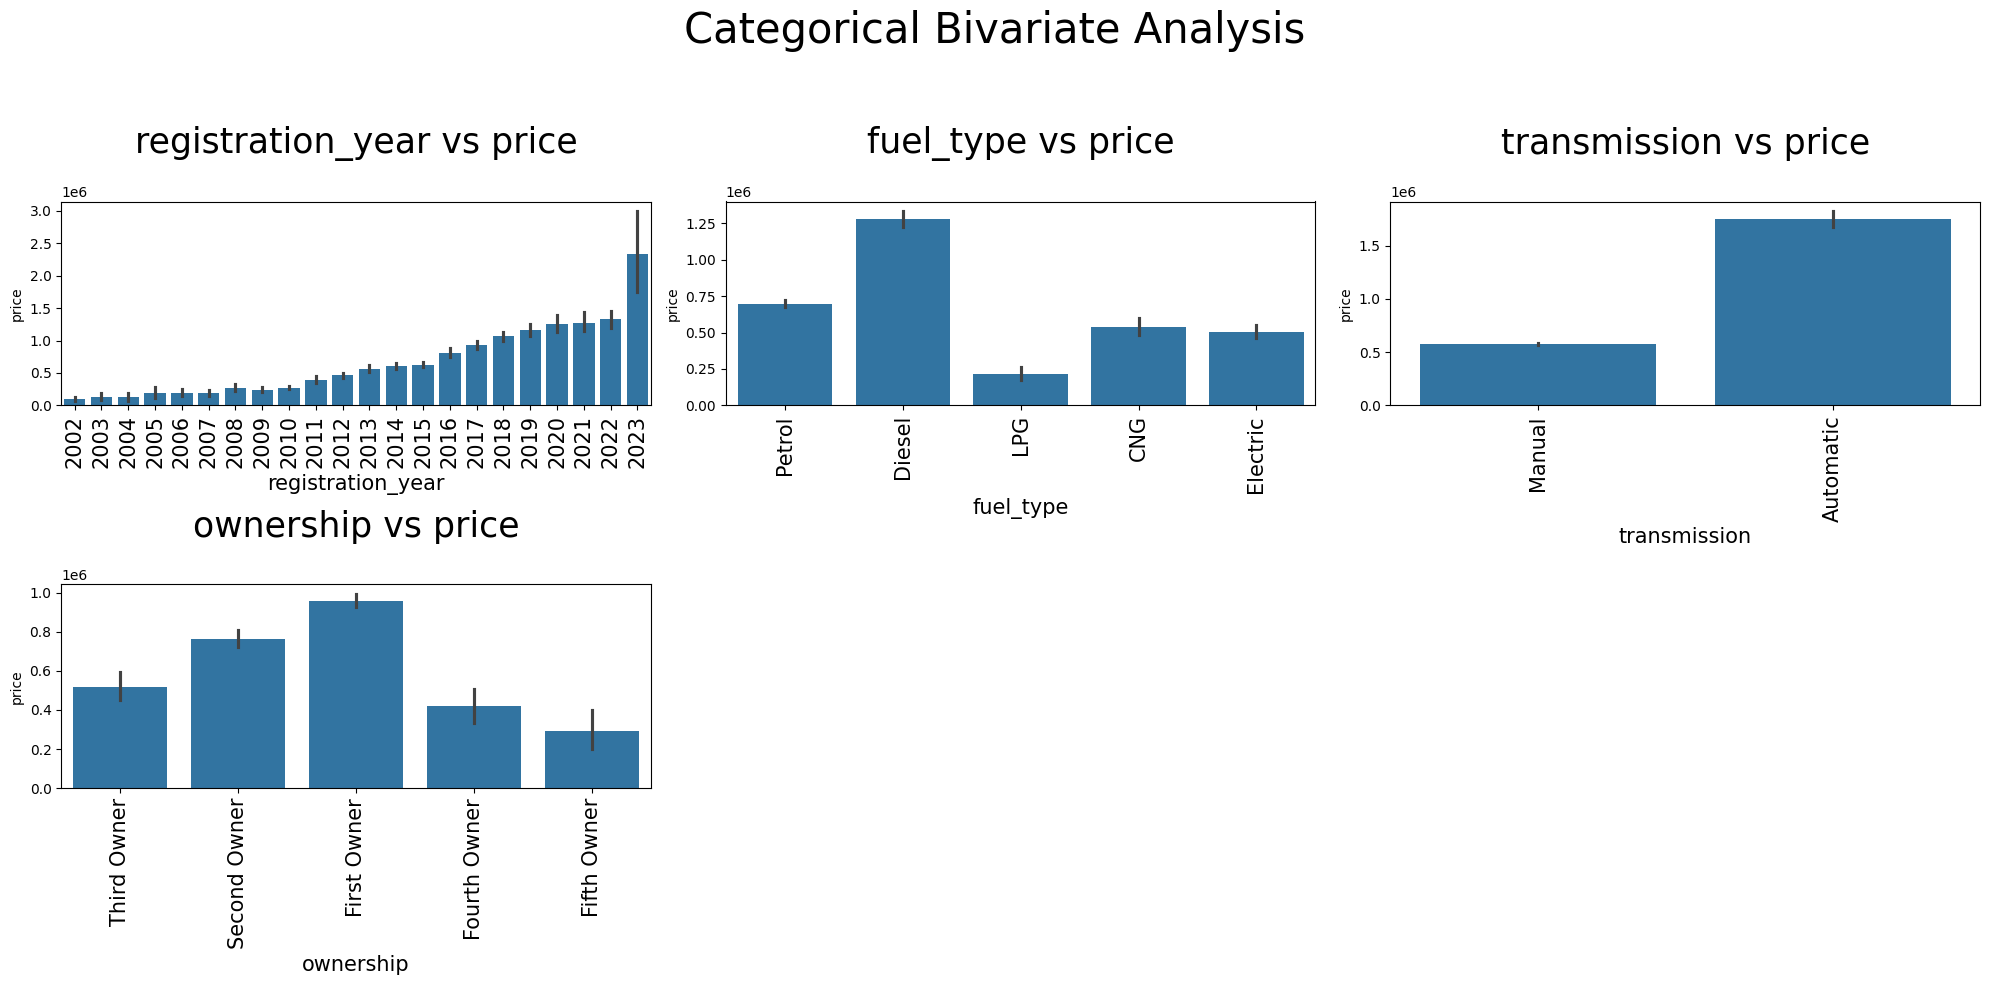

In [46]:
plt.figure(figsize = [20,10])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=30)
i=1
for col in cat_cols:
        plt.subplot(2,3,i)
        sns.barplot(x=cardata[col],y=cardata['price'])
        plt.title(f'{col} vs price\n', fontdict={'size':25})
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1
        
        
plt.tight_layout()
plt.show()

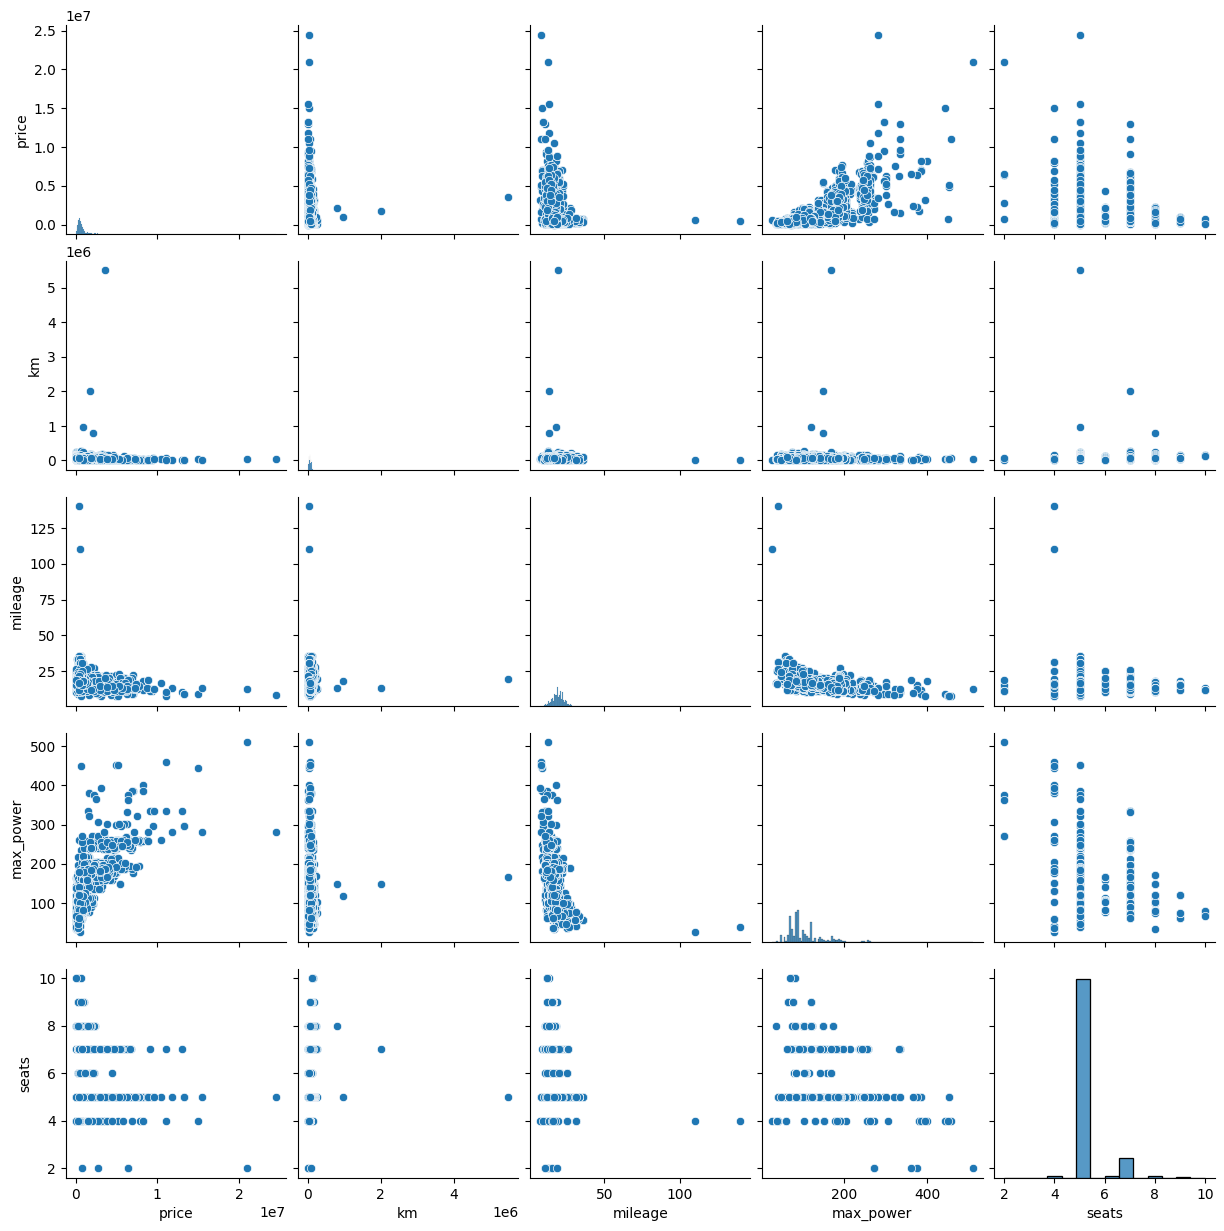

In [47]:
sns.pairplot(cardata[num_cols])
plt.show()

In [48]:
plt.figure(figsize = [20,10])
sns.heatmap(cardata.corr(),cmap='Greens', annot=True)

ValueError: could not convert string to float: 'bangalore'

<Figure size 2000x1000 with 0 Axes>